<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split




Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [3]:
data=r'C:\Users\marek\OneDrive\Pulpit\AiBD\AiBDlab\lab9/'
df = pd.read_csv('data.csv',sep=',')
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [4]:
categorical = ...
naglowki=['age','workclass',]
cat_str=df.dtypes[df.dtypes == 'object']
cat_num=df.dtypes[df.dtypes == 'int64']

#print('Dane tektowe zawierają kolumny :\n\n', categorical)
print('Dane tektowe zawierają kolumny :\n\n', list(cat_str.index))
print('Dane numeryczne zawierają kolumny :\n\n', list(cat_num.index))


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Dane numeryczne zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [17]:
categorical=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for var in categorical: 
    
    print(df[var].value_counts())
for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))



 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_16028/805465019.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_16028/805465019.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.floa

In [21]:
df.workclass.unique()


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:

df['workclass'].replace('?', '0', inplace=True)
df['occupation'].replace('?', '0', inplace=True)
df['native_country'].replace('?', '0', inplace=True)

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [38]:
X = df.drop(['income'], axis=1)
y =df['income'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape


((22792, 14), (9769, 14))

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [39]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship','race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is dep

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [40]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred


array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [41]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7939
Test set score: 0.7974


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7041  366]
 [1613  749]]

True Positives(TP) =  7041

True Negatives(TN) =  749

False Positives(FP) =  366

False Negatives(FN) =  1613


<AxesSubplot:>

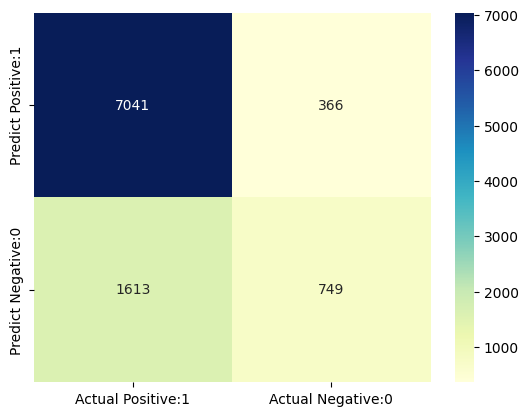

In [43]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [44]:
X = df.drop(['race'], axis=1)
y = df['race'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,7298,0,60,United-States,>50K
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,Female,1831,0,38,United-States,<=50K
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,0,50,United-States,>50K
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,Male,0,0,40,Guatemala,<=50K
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,Male,0,0,25,Germany,<=50K


In [45]:
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country', 'income'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is dep

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
# gnb

y_pred = gnb.predict(X_test)
print(y_pred)
print('\nModel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('\nTraining-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('\nTraining-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


y_pred_prob = gnb.predict_proba(X_test)

print('\nTraining set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('\nTest set score: {:.4f}'.format(gnb.score(X_test, y_test)))

[' White' ' White' ' White' ... ' White' ' White' ' White']

Model accuracy score: 0.8479
[' White' ' White' ' White' ... ' White' ' White' ' White']

Training-set accuracy score: 0.8369
[' White' ' White' ' White' ... ' White' ' White' ' White']

Training-set accuracy score: 0.8369

Training set score: 0.8369

Test set score: 0.8479


In [48]:
cm = confusion_matrix(y_test, y_pred)
print('\nTrue Positives (TP) = ', cm[0,0])
print('\nTrue Negatives (TN) = ', cm[1,1])
print('\nFalse Positives (FP) = ', cm[0,1])
print('\nFalse Negatives (FN) = ', cm[1,0])


True Positives (TP) =  0

True Negatives (TN) =  2

False Positives (FP) =  1

False Negatives (FN) =  0


<AxesSubplot:>

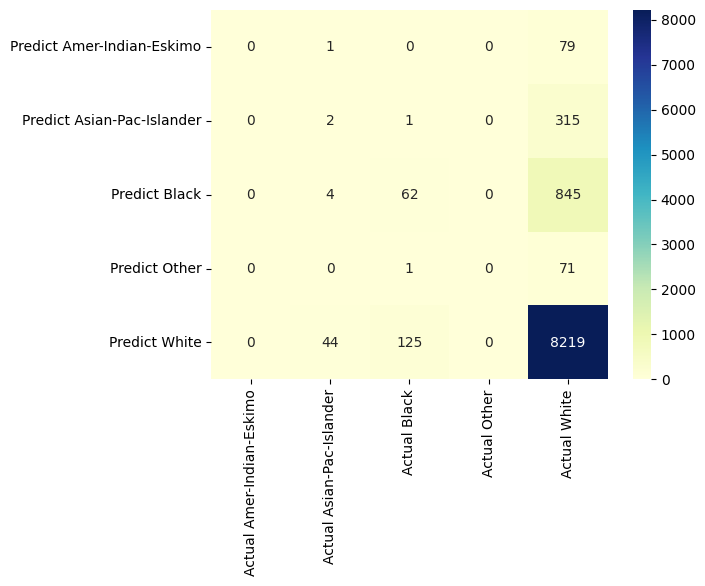

In [49]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Amer-Indian-Eskimo', 'Actual Asian-Pac-Islander', 'Actual Black', 'Actual Other', 'Actual White'], 
                                 index=['Predict Amer-Indian-Eskimo', 'Predict Asian-Pac-Islander', 'Predict Black', 'Predict Other', 'Predict White'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

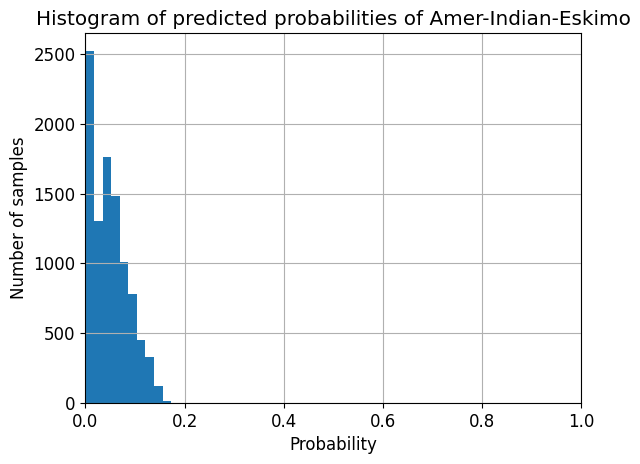

In [52]:
y_pred_1 = gnb.predict_proba(X_test)[:, 0]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_1, bins = 10)
plt.title('Histogram of predicted probabilities of Amer-Indian-Eskimo')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

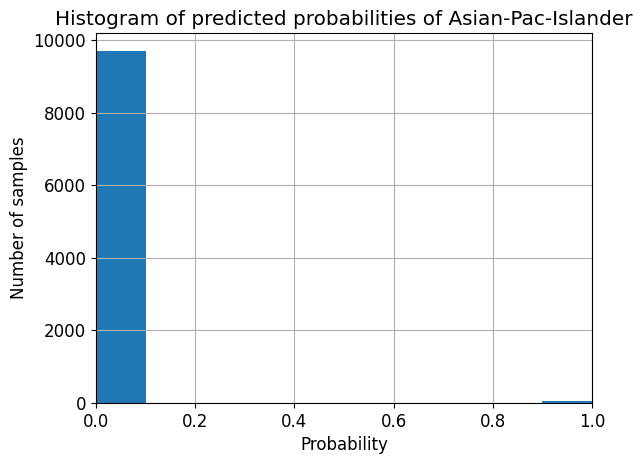

In [53]:
y_pred_2 = gnb.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_2, bins = 10)
plt.title('Histogram of predicted probabilities of Asian-Pac-Islander')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

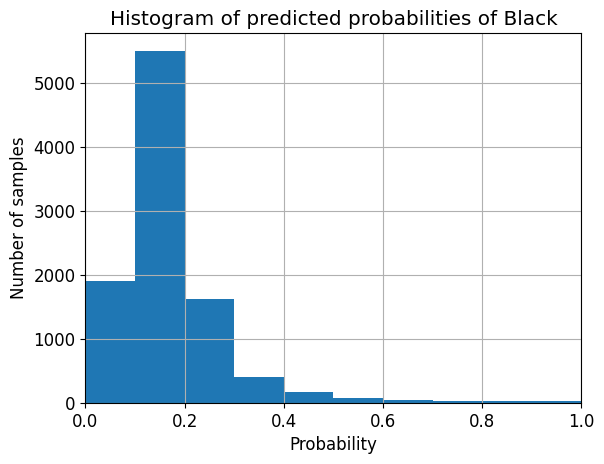

In [54]:
y_pred_3 = gnb.predict_proba(X_test)[:, 2]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_3, bins = 10)
plt.title('Histogram of predicted probabilities of Black')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

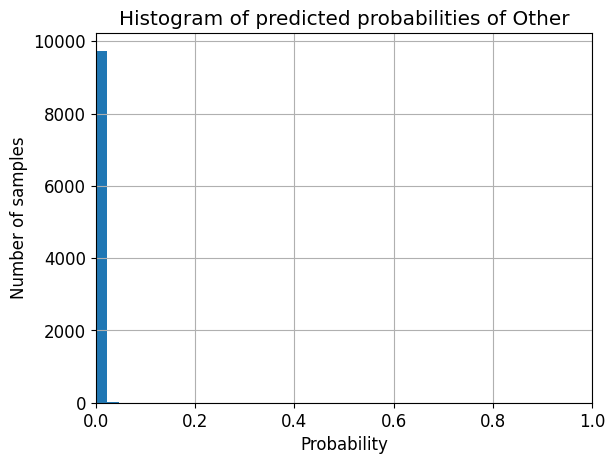

In [55]:
y_pred_4 = gnb.predict_proba(X_test)[:, 3]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_4, bins = 10)
plt.title('Histogram of predicted probabilities of Other')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

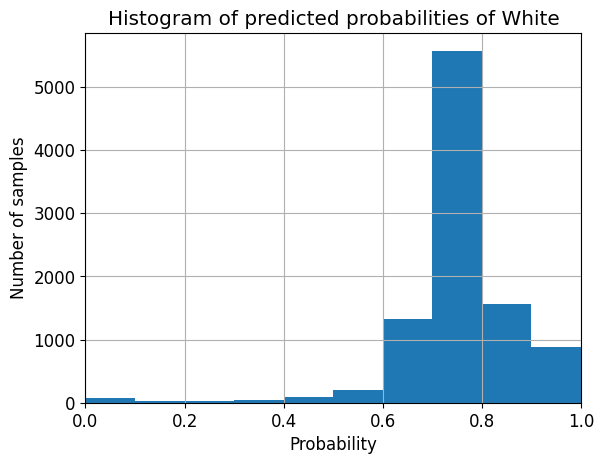

In [56]:
y_pred_5 = gnb.predict_proba(X_test)[:, 4]
plt.rcParams['font.size'] = 12
plt.hist(y_pred_5, bins = 10)
plt.title('Histogram of predicted probabilities of White')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

In [ ]:
#Dla native_country

In [58]:
X = df.drop(['native_country'], axis=1) 
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'income'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\marek\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is dep

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()

# fit the model
gnb_fit = gnb.fit(X_train, y_train)
print(gnb_fit)

GaussianNB()


In [61]:
y_pred = gnb.predict(X_test)
print(y_pred)
print('\nModel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[' Hong' ' Hong' ' Hong' ... ' United-States' ' Hong' ' Hong']

Model accuracy score: 0.0564


In [62]:
y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('\nTraining-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

[' United-States' ' United-States' ' Yugoslavia' ... ' Hong'
 ' United-States' ' Jamaica']

Training-set accuracy score: 0.0557


In [63]:
print('\nTraining set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('\nTest set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training set score: 0.0557

Test set score: 0.0564


In [64]:
cm = confusion_matrix(y_test, y_pred)
print('\nTrue Positives (TP) = ', cm[0,0])
print('\nTrue Negatives (TN) = ', cm[1,1])
print('\nFalse Positives (FP) = ', cm[0,1])
print('\nFalse Negatives (FN) = ', cm[1,0])


True Positives (TP) =  0

True Negatives (TN) =  0

False Positives (FP) =  0

False Negatives (FN) =  0


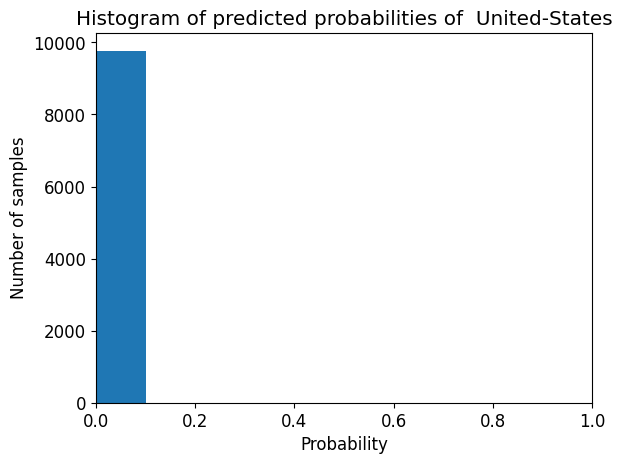

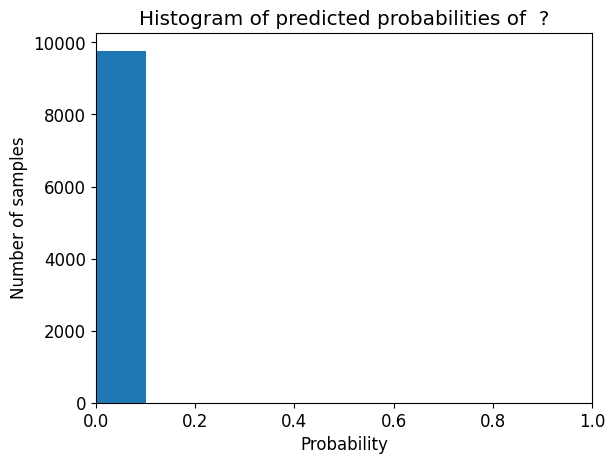

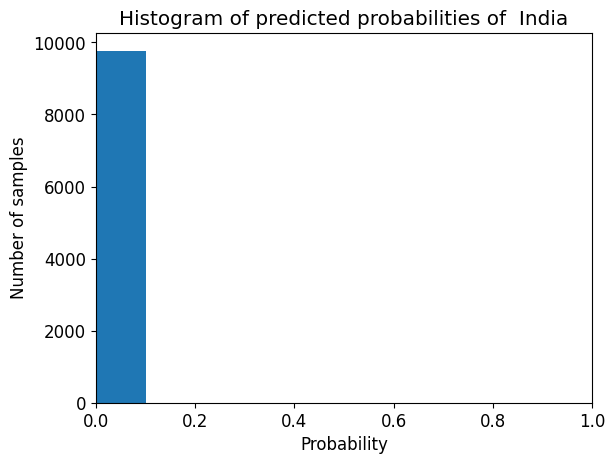

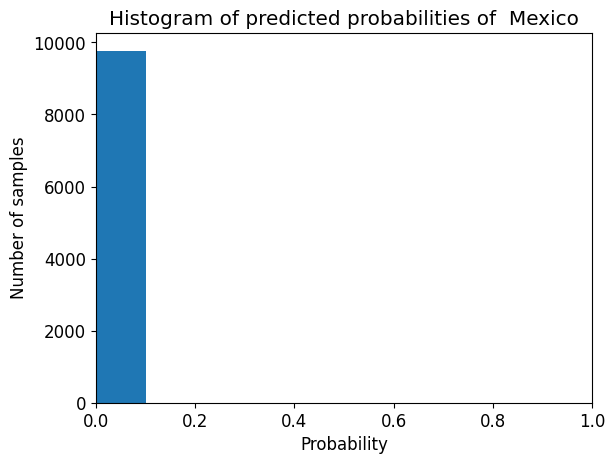

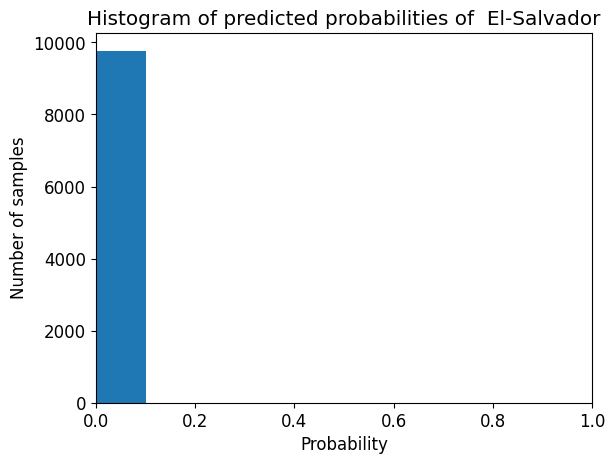

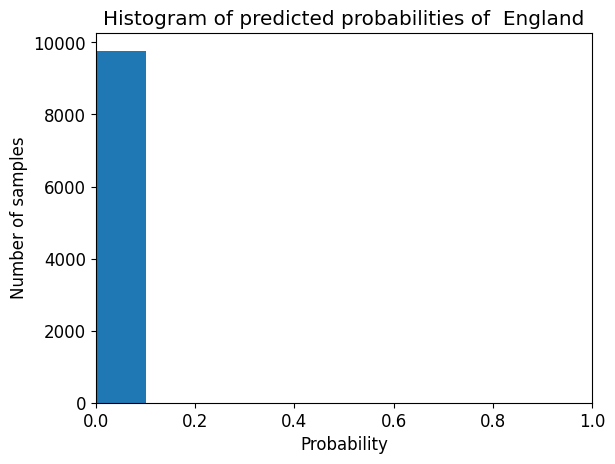

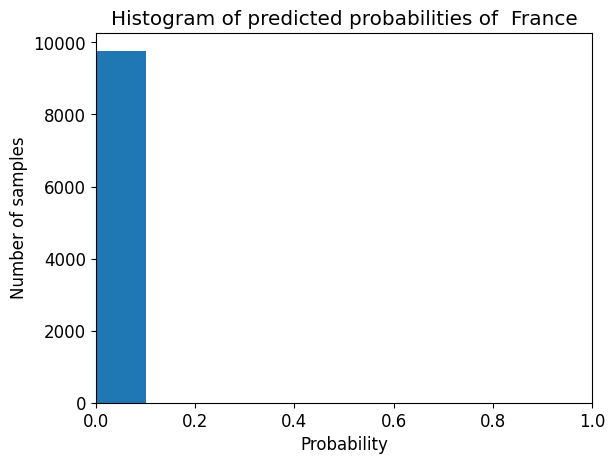

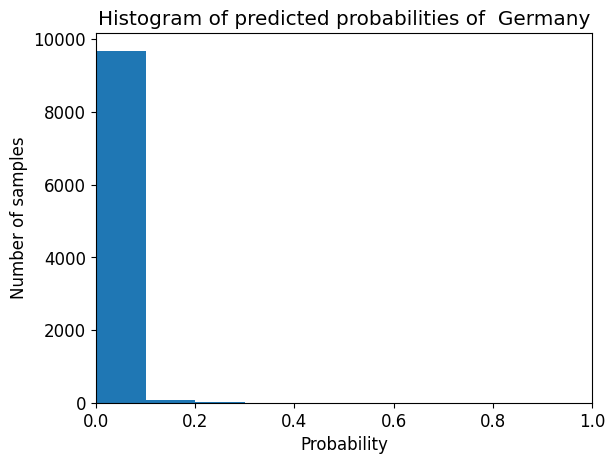

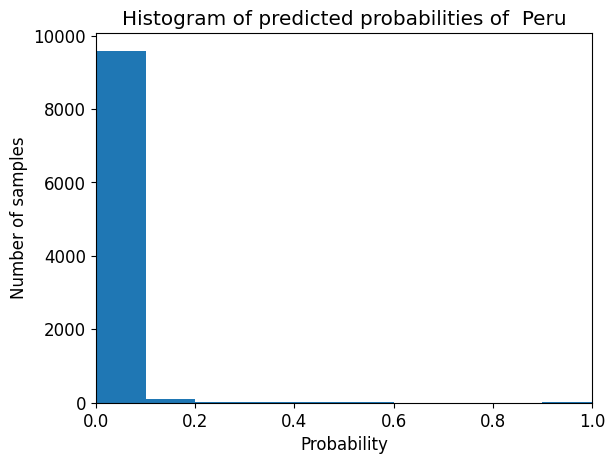

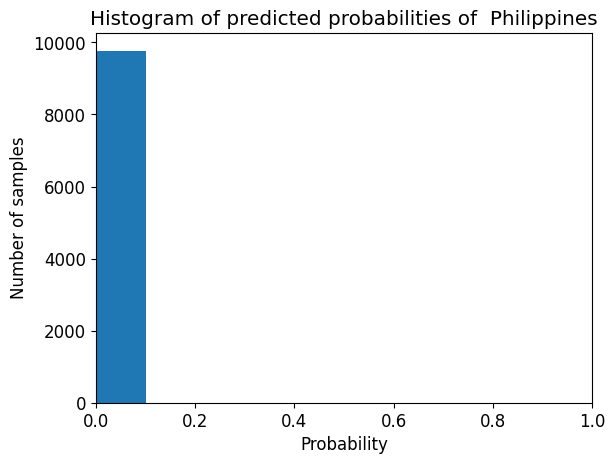

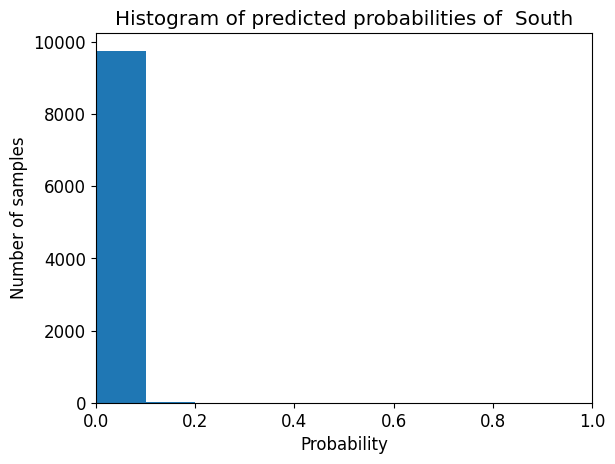

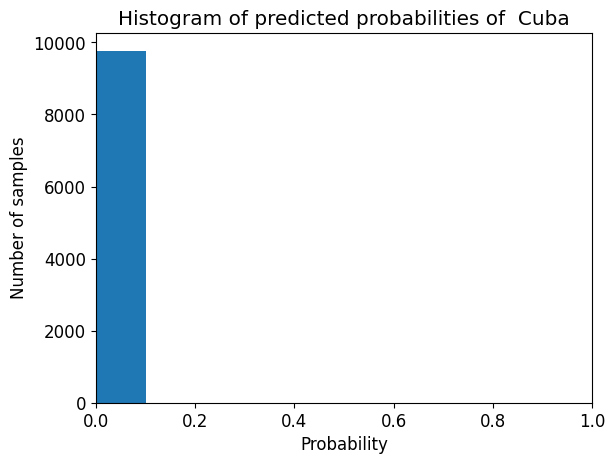

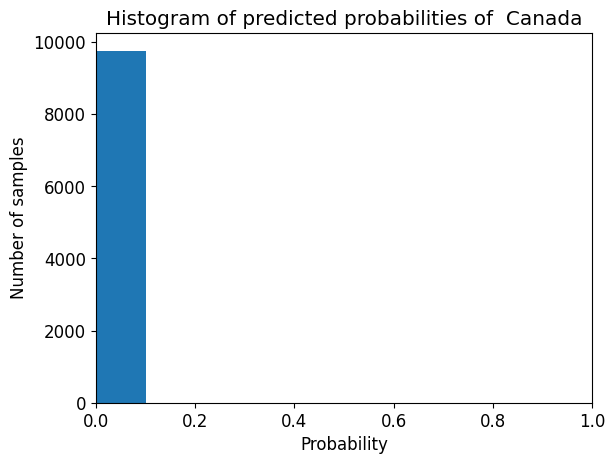

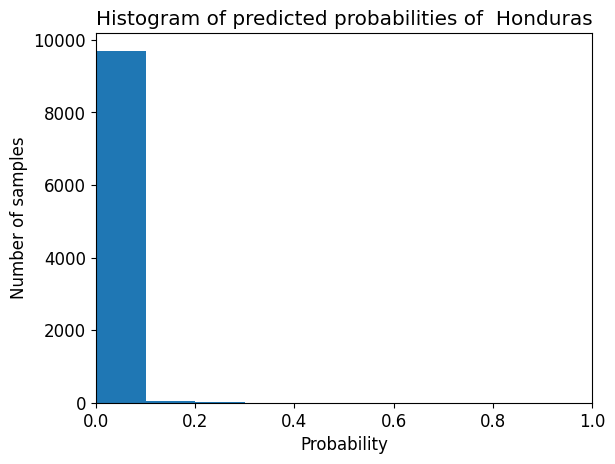

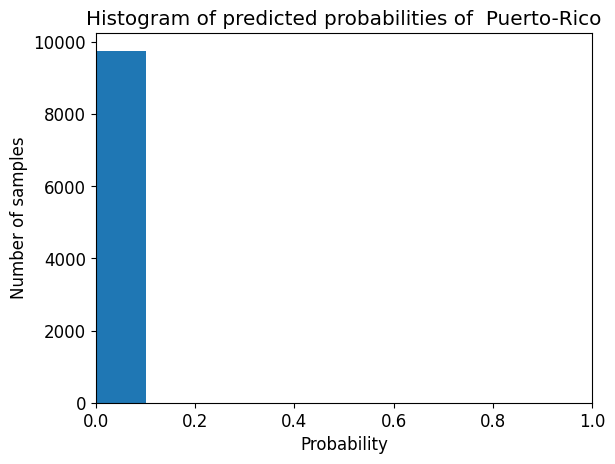

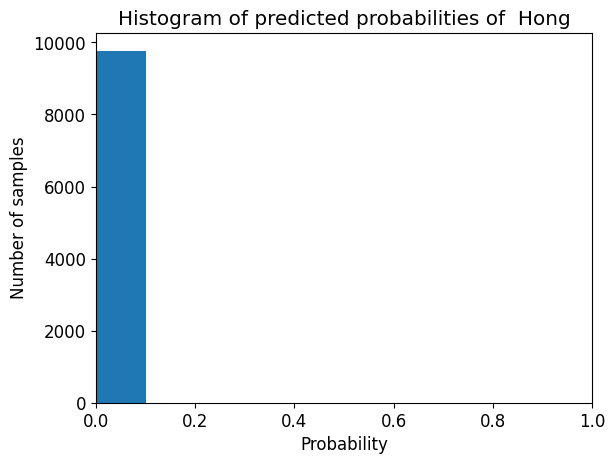

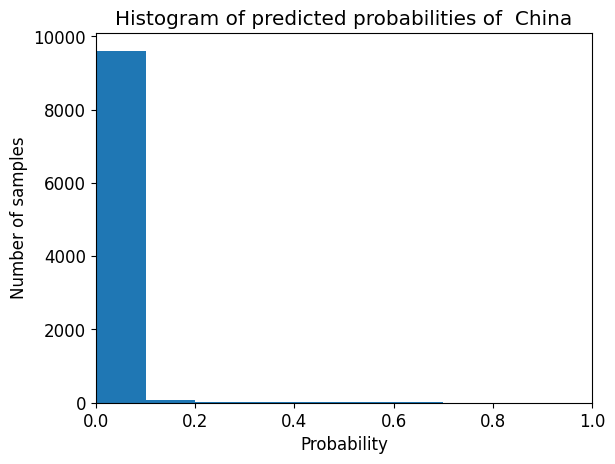

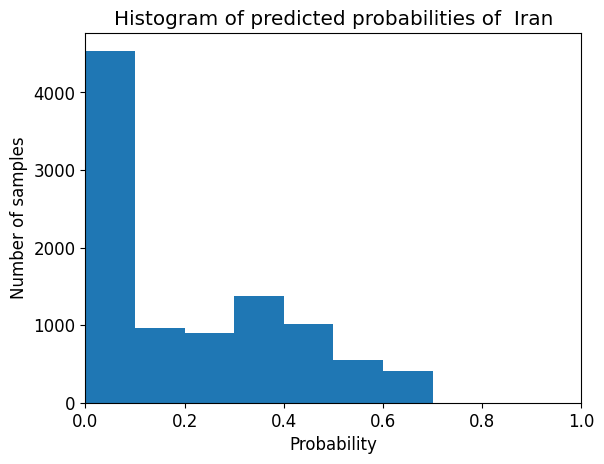

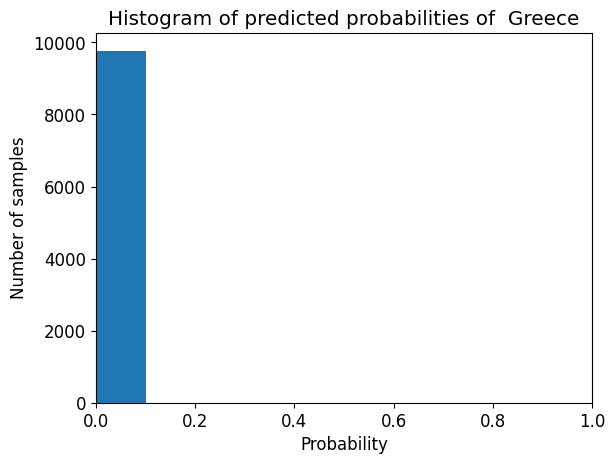

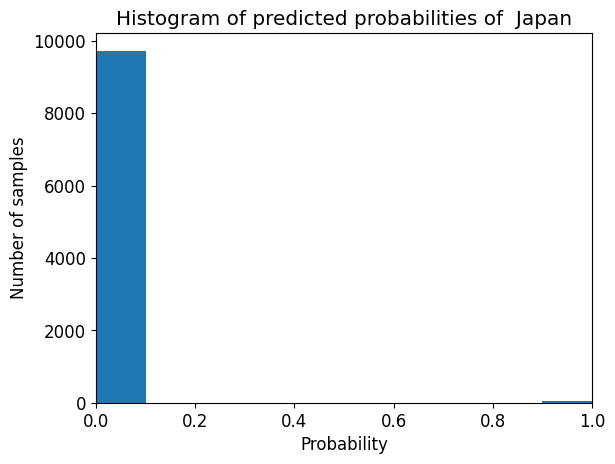

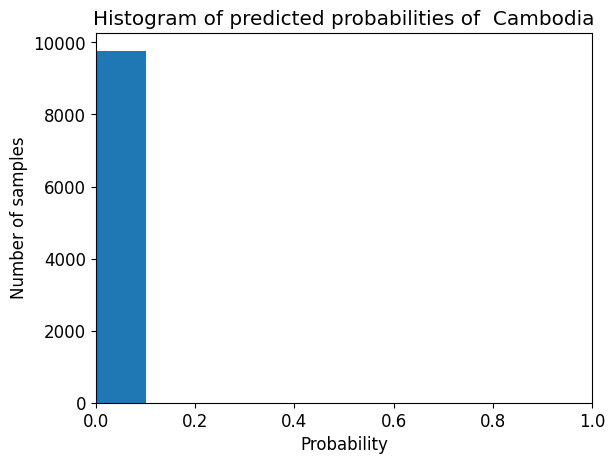

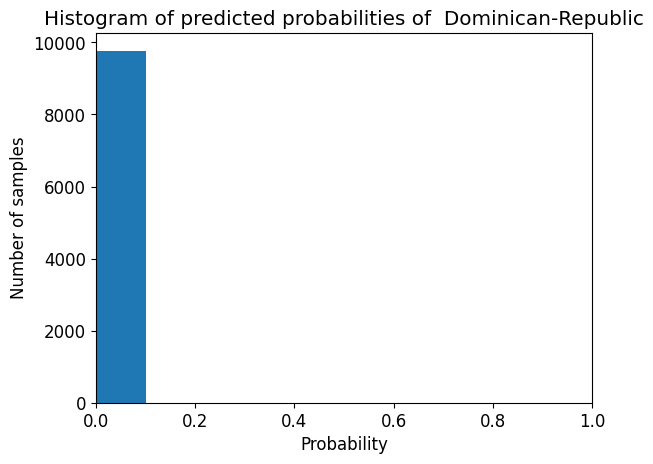

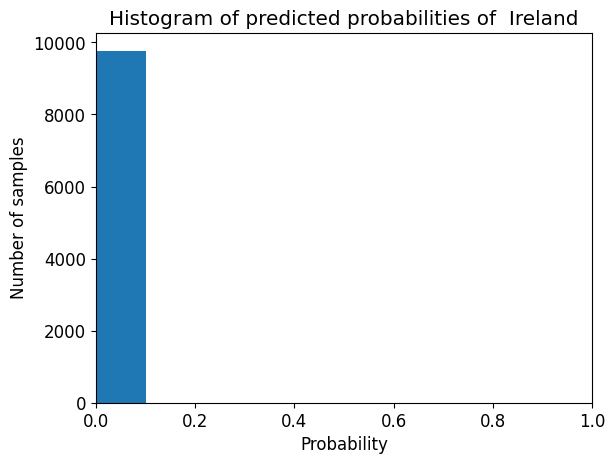

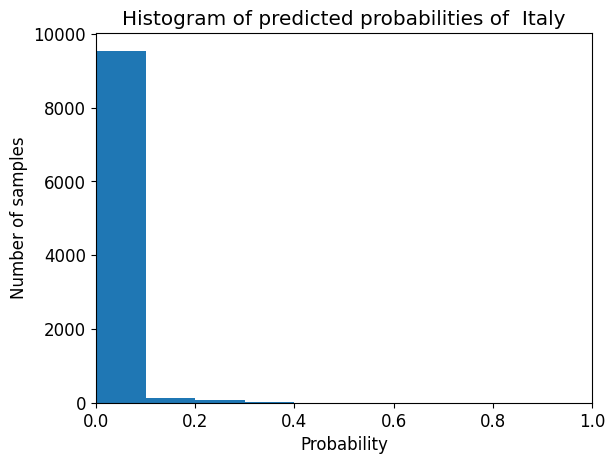

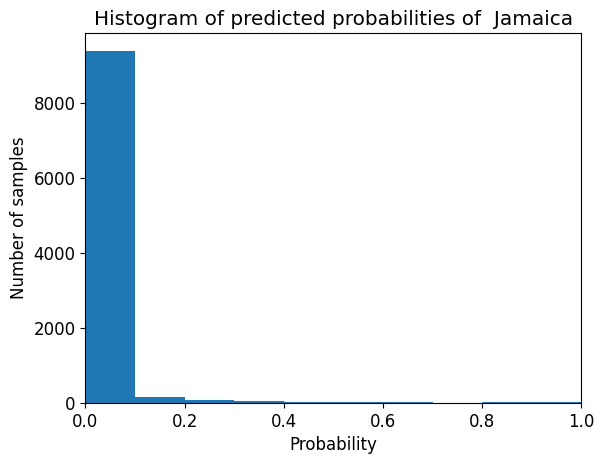

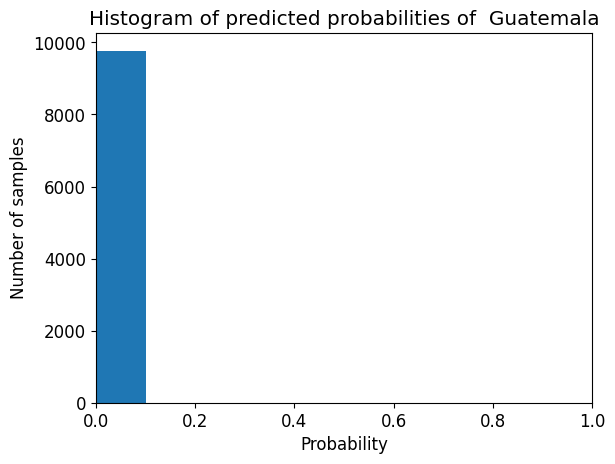

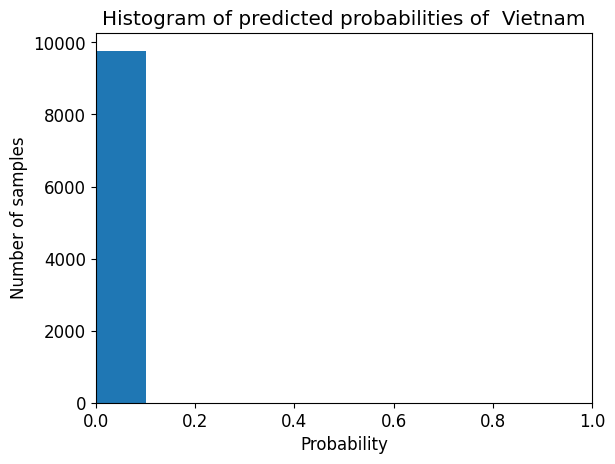

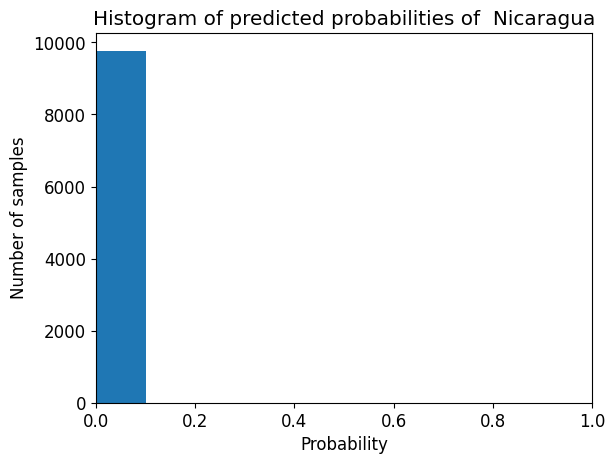

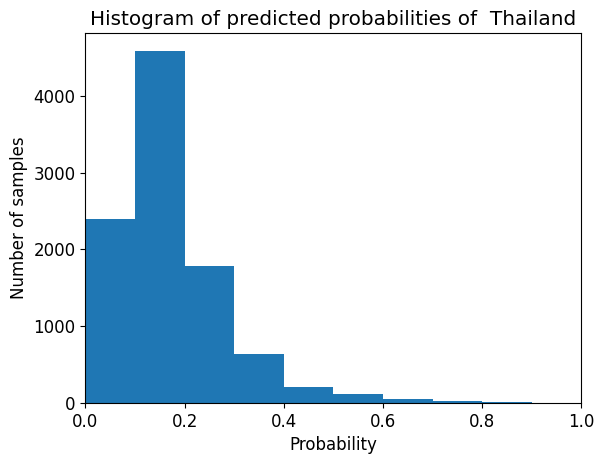

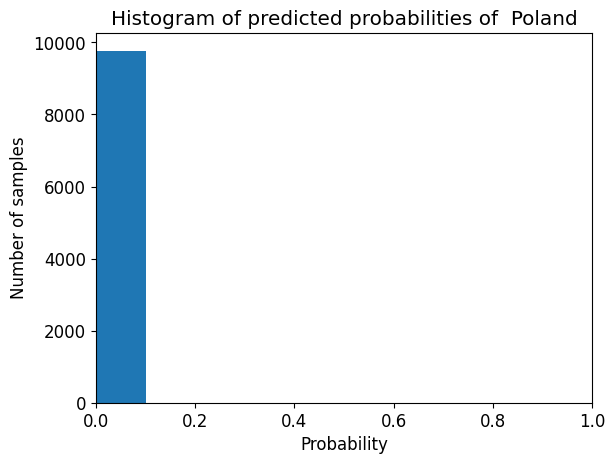

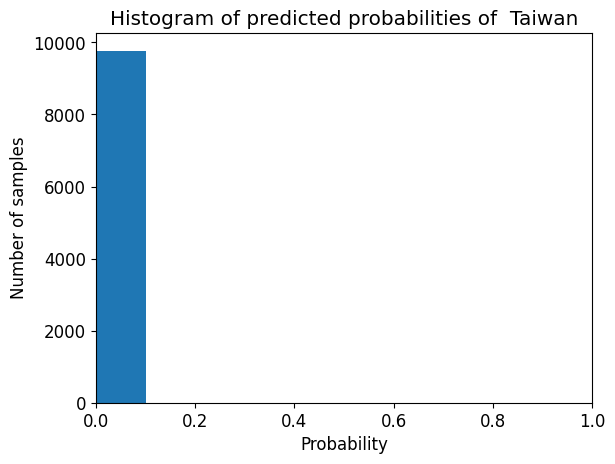

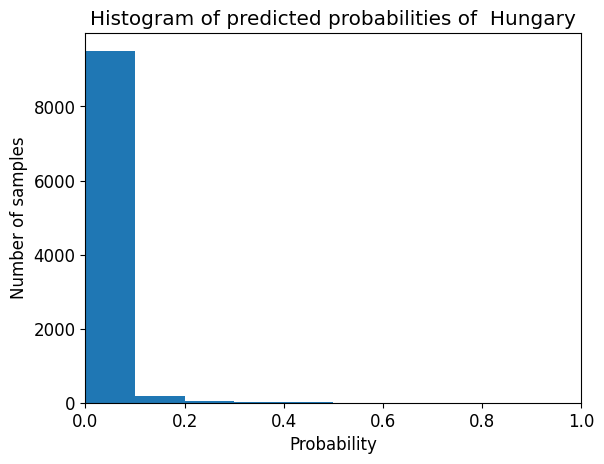

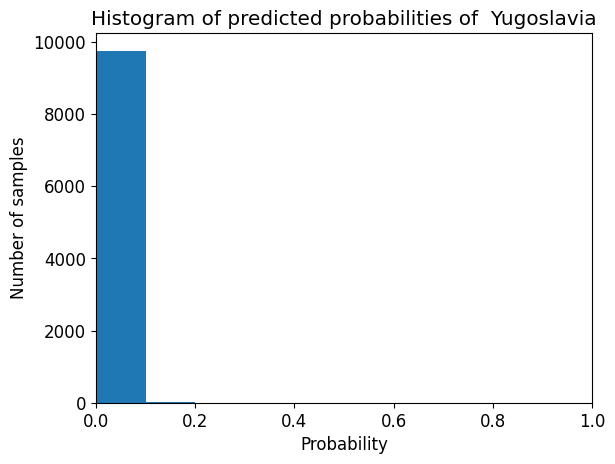

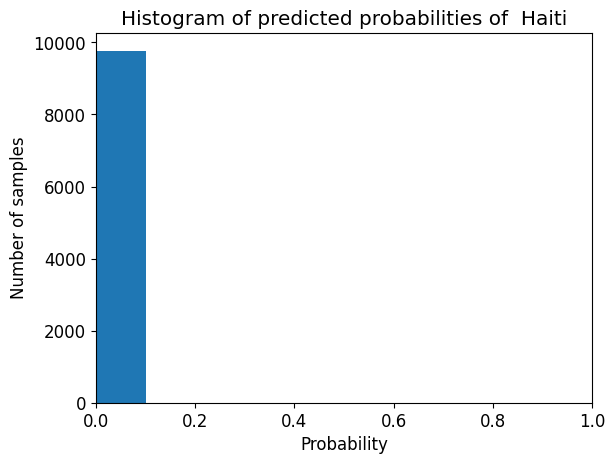

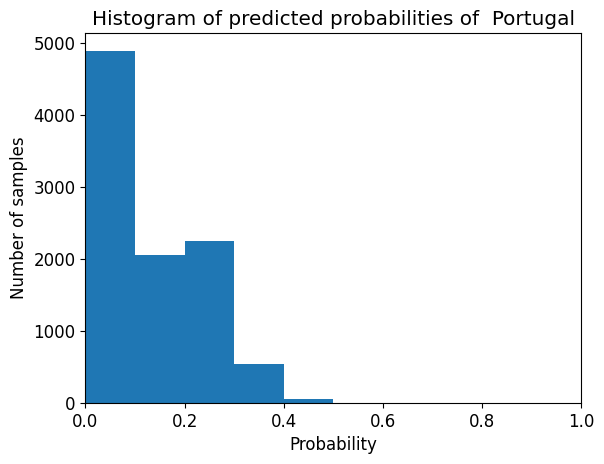

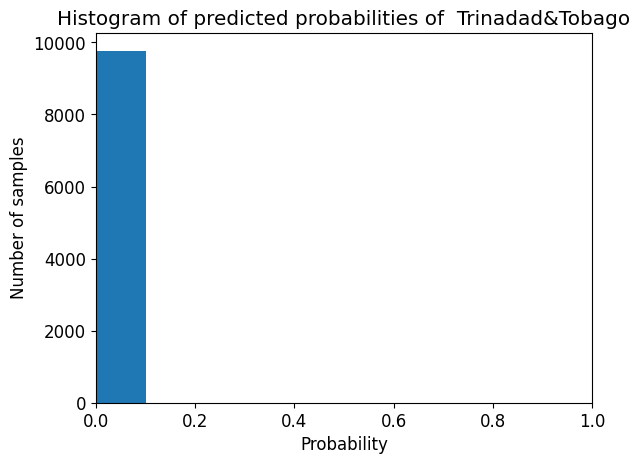

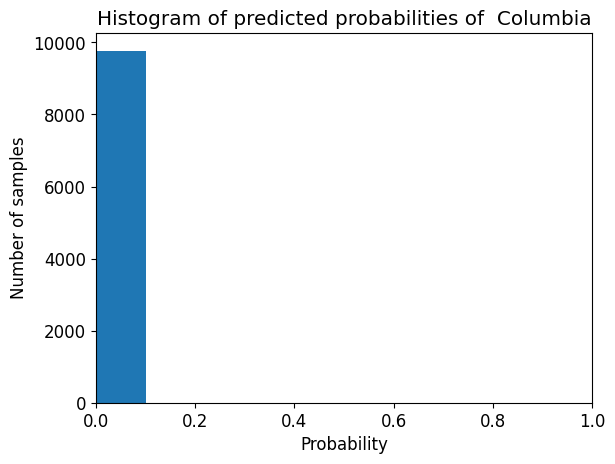

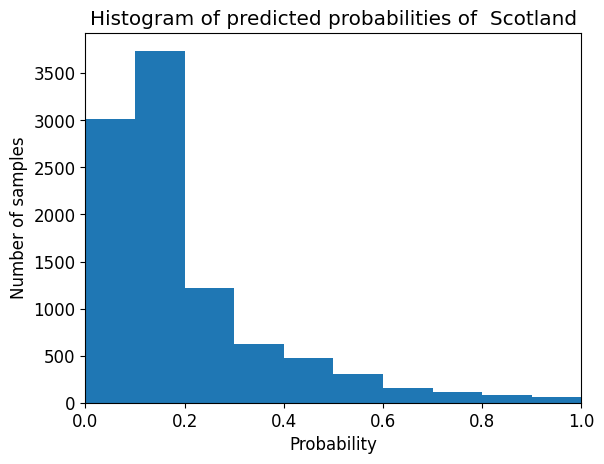

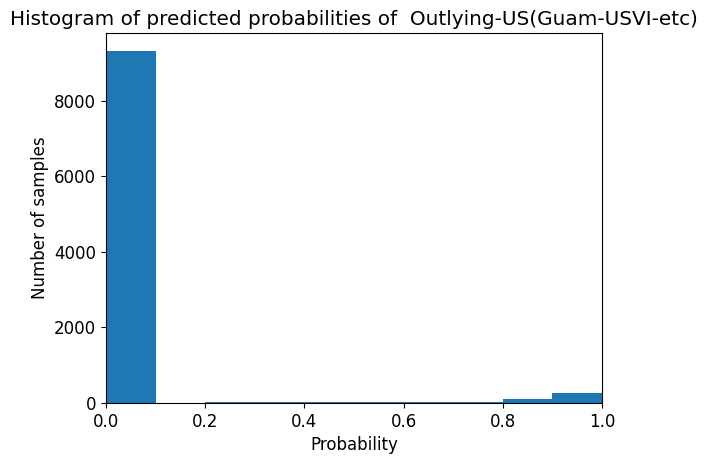

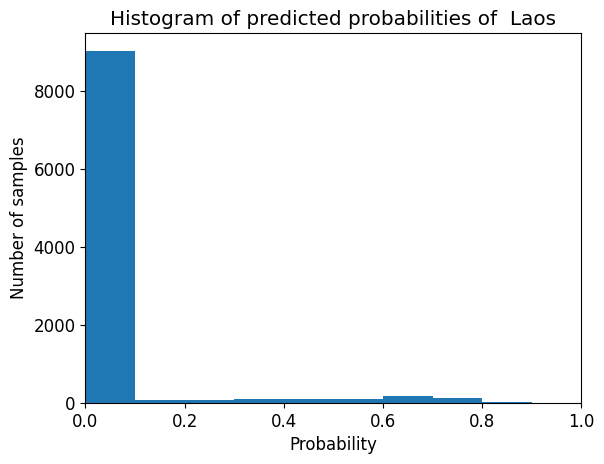

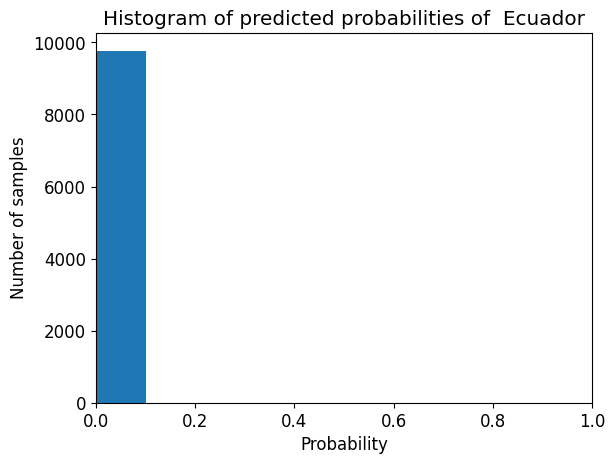

In [65]:
country = y_test.unique()
for i in range(len(country)):
    plt.rcParams['font.size'] = 12
    plt.hist(gnb.predict_proba(X_test)[:, i], bins = 10, range=(0,1))
    plt.title('Histogram of predicted probabilities of ' + country[i])
    plt.xlim(0,1)
    plt.xlabel('Probability')
    plt.ylabel('Number of samples')
    plt.grid
    plt.show()